In [4]:
import pydicom
from pydicom import dcmread 
import os
import random
import dicom2nifti
import nilearn
from nilearn import plotting

In [10]:
class Estudio: 

    def __init__(self,ruta_carpetaEstudio, path_carpetaTrabajo):
        self.ruta_estudio = ruta_carpetaEstudio
        self.imgCarpeta = os.listdir(rf'{self.ruta_estudio}')
        self.idEstudio = pydicom.dcmread(os.path.join(self.ruta_estudio,self.imgCarpeta[0])).StudyID
        self.path_carpetaTrabajo = path_carpetaTrabajo
         
        Paciente.agregar_estudioPaciente(self)

    def verDiccionario(self):
        Paciente.mostrarDic(self)


    def anonimizar(self):

        nombreEstudio_anonimus = input("Ingrese un nombre o codigo para el estudio: ")

        lista_nombreCarpeta1 = os.listdir(rf"{self.path_carpetaTrabajo}")                
        
        nuevaCarpeta_anonimus = os.path.join(self.path_carpetaTrabajo,f'CarpetaDatos_Anonimizados_{nombreEstudio_anonimus}')

        ruta_nuevaCarpeta_anonimus = os.path.abspath(f'CarpetaDatos_Anonimizados_{nombreEstudio_anonimus}')

        if f'CarpetaDatos_Anonimizados_{nombreEstudio_anonimus}' in lista_nombreCarpeta1:

            pass
        
        else:
            os.mkdir(nuevaCarpeta_anonimus)


        id = f'P{random.randint(1,4560)}I{random.randint(1,4560)}D'
        name = f'P{random.randint(1,4560)}N'
        sex = f'P{random.randint(1,4560)}S'
        
        for i in range(len(self.imgCarpeta)):
        
            archivo = pydicom.dcmread(os.path.join(self.ruta_estudio,self.imgCarpeta[i]))
            archivo['PatientID'].value = id
            archivo['PatientBirthDate'].value= None
            archivo['PatientName'].value = name
            archivo['PatientSex'].value= sex
            archivo.save_as(f'{os.path.join(ruta_nuevaCarpeta_anonimus,self.imgCarpeta[i])}')

    def convertirEstudio(self):

        nombreEstudio = input("Ingrese un nombre o codigo para el estudio: ")

        lista_nombreCarpeta = os.listdir(rf"{self.path_carpetaTrabajo}")                
        
        nuevaCarpeta = os.path.join(self.path_carpetaTrabajo,f'CarpetaNifti_{nombreEstudio}')

        if f'CarpetaNifti_{nombreEstudio}' in lista_nombreCarpeta:

            pass
        
        else:
            os.mkdir(nuevaCarpeta)

        try:     
    
            dicom2nifti.convert_directory(self.ruta_estudio,nuevaCarpeta)
            print('Carpeta creada exitosamente')

        except (UnboundLocalError,ValueError):
            print('Ha ocurrdio un error')


    def visualizarNilearn(self,ruta_ArchivoNifti):

            try:
                imagen = nilearn.image.load_img(rf'{ruta_ArchivoNifti}')

                menu_ppl = int(input("""
                                                Seleccione el modo de vista deseado:

                                                        1) Un solo plano
                                    
                                                        2) Los tres planos 
                                    
                                                        3) Mosaico
                                    
                                                        4) Salir

                                                                            Respuesta: """))
                if menu_ppl not in range(1,5):
                    raise ValueError
            
                

                if menu_ppl == 1:

                        try:
                            menuSec = int(input("""
                                                    Seleccione el plano que desea ver:
                                                
                                                        1) Axial
                                                
                                                        2) Coronal
                                                
                                                        3) Sagital
                                                
                                                        4) Salir
                                                    
                                                                        Respuesta:  """))
                            
                            if menuSec not in range(1,5):
                                raise ValueError
                            
                            if menuSec == 1:

                                plotting.plot_anat(imagen, display_mode='z', title='Plano axial')

                            if menuSec == 2:

                                plotting.plot_anat(imagen, display_mode='y', title='Plano coronal')

                            if menuSec == 3: 

                                plotting.plot_anat(imagen, display_mode='x', title='Plano sagital')

                            if menuSec == 4:

                                pass
                        except:
                            print("No se aceptan letras y solo se aceptan numeros que esten en el rango de 1 a 4")     

                if menu_ppl == 2:
                    
                    plotting.plot_anat(imagen, display_mode='ortho', title='Planos Coronal, Sagital y Axial')

                if menu_ppl == 3:

                    plotting.plot_anat(imagen,title='Mosaico',display_mode="mosaic")

                if menu_ppl == 4:

                    pass
            except :
                print("No se aceptan letras y solo se aceptan numeros que esten en el rango de 1 a 4")

class Paciente(Estudio):

    estudiosPaciente = {} 

    def __init__(self, ruta_carpetaEstudio, path_carpetaTrabajo):
        super().__init__(ruta_carpetaEstudio, path_carpetaTrabajo)

    
    def obtencionID(self):
        archivo = pydicom.dcmread(os.path.join(self.ruta_estudio,self.imgCarpeta[0]))
        archivo = archivo.PatientID
        return archivo

    def agregar_estudioPaciente(self):
        iD = Paciente.obtencionID(self)
        llaves = Paciente.estudiosPaciente.keys()

        if iD in llaves:
            comprobante = Paciente.estudiosPaciente[iD]
            if self.ruta_estudio in comprobante:
                pass
            else:
                Paciente.estudiosPaciente[iD] += [self.ruta_estudio]     

        else:
            Paciente.estudiosPaciente[iD] = [self.ruta_estudio]

    def mostrarDic(self):
        print(Paciente.estudiosPaciente)

        

C:\Users\randy\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\nilearn\image\resampling.py:809: UserWarning: Casting data from int32 to float32
  return resample_img(


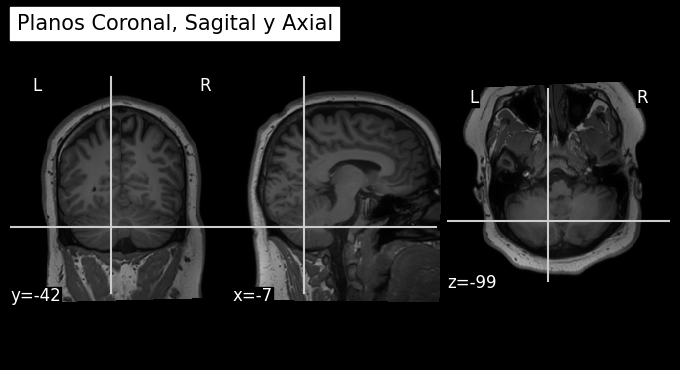

In [14]:
prueba1 = Estudio('0001',r'C:\Documentos\Udea Clases\Tercer Semestre\Informatica 2\Trabajo_tercera_unidad')
#prueba1.verDiccionario()
#prueba1.convertirEstudio()
prueba1.visualizarNilearn(r'CarpetaNifti_0001\1_rm_cerebro_t1.nii.gz')
#prueba1.anonimizar()
#prueba2 = Estudio('0003',r'C:\Documentos\Udea Clases\Tercer Semestre\Informatica 2\Trabajo_tercera_unidad')
#prueba3 = Estudio('0002',r'C:\Documentos\Udea Clases\Tercer Semestre\Informatica 2\Trabajo_tercera_unidad')
#print(prueba1.idEstudio,prueba2.idEstudio)


In [ ]:
class SistemaGestion:
    
    id_list = [] 
    #id_list = Paciente.estudiosPaciente.keys()
            # if submenu1 == 1:
            # for h in Implante.numeroMarcapasos:
            #     print(f'\tN°: { Implante.numeroMarcapasos.index(h) + 1}, \n{h}')
            # eleccion = int(input("\nIngrese el numero de implante que desea eliminar: "))
            # eleccion -= 1
            # lista = dic[eleccion]
            # Implante.numeroImplantes.remove(Implante.numeroMarcapasos[eleccion])
            # Implante.numeroMarcapasos.pop(eleccion)
            # print("-"*50 + "Se ha eliminado exitosamente" + "-"*50)

    def __init__(self,ruta_carpetaEstudio, path_carpetaTrabajo):
        self.estudio = Estudio(ruta_carpetaEstudio, path_carpetaTrabajo)
        self.paciente = Paciente(ruta_carpetaEstudio, path_carpetaTrabajo)
        self.ruta_estudion = None 
        
    # def __init__(self, ruta_carpetaEstudio, path_carpetaTrabajo):
    #     super().__init__(ruta_carpetaEstudio, path_carpetaTrabajo)        

    def infoPacientes (self):
        for key in self.paciente.estudiosPaciente:
            
            if key in SistemaGestion.id_list:
                pass
            else:
                SistemaGestion.id_list.append(key)

        #Paciente.estudiosPaciente.keys()

    def manejoEstudios (self):
        while True:
        
            menu_est = input('''Ingrese el número de la acción que desea realizar:
                                1. Añadir estudio.
                                2. Consultar información de un estudio.
                                3. Eliminar estudio.''')
         
            if menu_est == '1':
                ruta_estudio = input('Ingrese la ruta de la carpeta del estudio que quiere añadir: ')
                self.ruta_estudio = rf'{ruta_estudio}'
                self.paciente.agregar_estudioPaciente()
                print('El estudio se agregó de manera correcta')
                break

            elif menu_est == '2':
                for key in self.paciente.estudiosPaciente:
                    if key in id_list:
                        pass
                    else:
                        id_list.append(key)

            elif menu_est == '3':
                break
            else:
                print('Ingrese una opción válida')
                continue

    def mostrarLista(self):
        self.paciente.mostrarDic

In [37]:
a = pydicom.dcmread('0001/IMG0001.dcm')
a
# print(a.PatientID)
# a['PatientID'].value= f'P{random.randint(1,5252)}I{random.randint(1,5252)}D'
# print(a.PatientID)
            
            

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 258
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1125.1.35413466869556812327990599999106158
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.3.0.10.111.124.113
(0002, 0013) Implementation Version Name         SH: 'GDCM 3.0.10'
(0002, 0016) Source Application Entity Title     AE: 'GDCM/ITK 5.3.0'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'MPR']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID          

In [69]:
b = pydicom.dcmread('0002\IMG_0000_0001.dcm')
b

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 258
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: MR Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.826.0.1.3680043.2.1125.1.14003393936698848717969612218995194
(0002, 0010) Transfer Syntax UID                 UI: Implicit VR Little Endian
(0002, 0012) Implementation Class UID            UI: 1.2.826.0.1.3680043.2.1143.107.104.103.115.3.0.10.111.124.113
(0002, 0013) Implementation Version Name         SH: 'GDCM 3.0.10'
(0002, 0016) Source Application Entity Title     AE: 'GDCM/ITK 5.3.0'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 192'
(0008, 0008) Image Type                          CS: ['ORIGINAL', 'PRIMARY', 'MPR']
(0008, 0016) SOP Class UID                       UI: MR Image Storage
(0008, 0018) SOP Instance UID          